# Estatísticas Gerais:  Vila Áurea 

Neste notebook, são apresentados quatros gráficos com médias dos valores de vazao dos 60 ultimos dias.

In [5]:
import pandas as pd 
import numpy as np
from scipy import stats
from os import path
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from estatisticas_time_serie import readData, create_dataset, forecasting


In [6]:
def rolling_mean_and_std_by_day(dataframe):
    data_matrix = dataframe.as_matrix()

    data_matrix = data_matrix[:,1:] # Excluindo a coluna das des
    new_data_matrix = {}

    # passando para um dicionario onde cada posicao tera a lista de valores de cada dia
    keys = [item.split('-')[1] + ' '+ item.split('-')[2].split(" ")[0] for item in data_matrix[:,0]]
    for idx,val in enumerate(data_matrix):
        if not keys[idx] in new_data_matrix.keys():
            new_data_matrix[keys[idx]]=[]
            if not np.isnan(val[1]):
                new_data_matrix[keys[idx]].append(val[1])
            else:
                new_data_matrix[keys[idx]].append(0)
        else:
            if not np.isnan(val[1]):
                new_data_matrix[keys[idx]].append(val[1])
            else:
                new_data_matrix[keys[idx]].append(0)
    # calculando media e std
    mean_on_days=[]
    std_on_days=[]
    for id_ in new_data_matrix:
        mean_on_days.append(np.mean(new_data_matrix[id_]))
        std_on_days.append(np.std(new_data_matrix[id_]))

    # retornando valores de media  e desvio padrao por dia
    return mean_on_days, std_on_days

In [7]:
def rolling_mean_and_std_by_month(dataframe):
    data_matrix = dataframe.as_matrix()

    data_matrix = data_matrix[:,1:] # Excluindo a coluna das des
    new_data_matrix = {}

    # passando para um dicionario onde cada posicao tera a lista de valores de cada mes
    keys = [item.split('-')[1] for item in data_matrix[:,0]]
    for idx,val in enumerate(data_matrix):
        if not keys[idx] in new_data_matrix.keys():
            new_data_matrix[keys[idx]]=[]
            if not np.isnan(val[1]):
                new_data_matrix[keys[idx]].append(val[1])
            else:
                new_data_matrix[keys[idx]].append(0)
        else:
            if not np.isnan(val[1]):
                new_data_matrix[keys[idx]].append(val[1])
            else:
                new_data_matrix[keys[idx]].append(0)
    # calculando media e std
    mean_on_days=[]
    std_on_days=[]
    for id_ in new_data_matrix:
        mean_on_days.append(np.mean(new_data_matrix[id_]))
        std_on_days.append(np.std(new_data_matrix[id_]))

    # retornando valores de media  e desvio padrao por dia
    return mean_on_days, std_on_days

In [146]:
sensores = [
    '690a-vazao-vila-aurea-20-04-2016.csv'
    #'690g-vila-aurea-60d.csv',
    #'605g-vila-aurea-60d.csv',
    #'735g-vila-aurea-60d.csv'
]

titulos = [
    ['Vazao','Vila Aurea, 1 ano, s690']
    #['Pressao', 'Vila Aurea, 60 dias, s690'],
    #['Pressao','Vila Aurea, 60 dias, s605'],
    #['Pressao','Vila Aurea, 60 dias, s735']
]

# getting the dataframes
dataframes = []
for item in sensores:
    # reading data
    df = readData(item)
    dataframes.append(df)

In [152]:
# plotando grafico de media e desvio padrao por dia
for idx,df in enumerate(dataframes):
    means, stds = rolling_mean_and_std_by_day(df)
    fig = plt.gcf()
    
    x = np.arange(1, len(means)+1,1) # Obtendo números no intervalo [1,num_dias]
    y = means

    plt.errorbar(x, y, yerr = stds, color='red')
    plt.title(titulos[idx][1] + ' (media/std por dia)',fontsize=20)
    plt.xlabel('Dias',fontsize=20)
    
    plt.ylabel(titulos[idx][0],fontsize=20)
    fig.set_size_inches(18.5, 14.5)
    #plt.show()
    
    
    # mean by month
    means, stds = rolling_mean_and_std_by_month(df)
    fig = plt.gcf()
    fig, ax = plt.subplots()
    
    ind = np.arange(len(means)) # months numbers
    width = 0.35

    ax.bar(ind, means, width, color='r', yerr=stds)
    plt.title(titulos[idx][1] + ' (media/std por mes)',fontsize=20)
    plt.xlabel('Month',fontsize=20)
    ax.set_xticks((ind + width / 2)-0.2)
    ax.set_xticklabels(('Dez', 'Jan', 'Fev', 'Mar', 'Abr'))
    
    plt.ylabel(titulos[idx][0],fontsize=20)
    fig.set_size_inches(18.5, 14.5)
    #plt.show()
    
    

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import time
import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

In [18]:
values     = df['Value']

newV=[]
for i in values:
    if not (np.isnan(i)): 
        newV.append(float(i))

newV = np.array(newV)

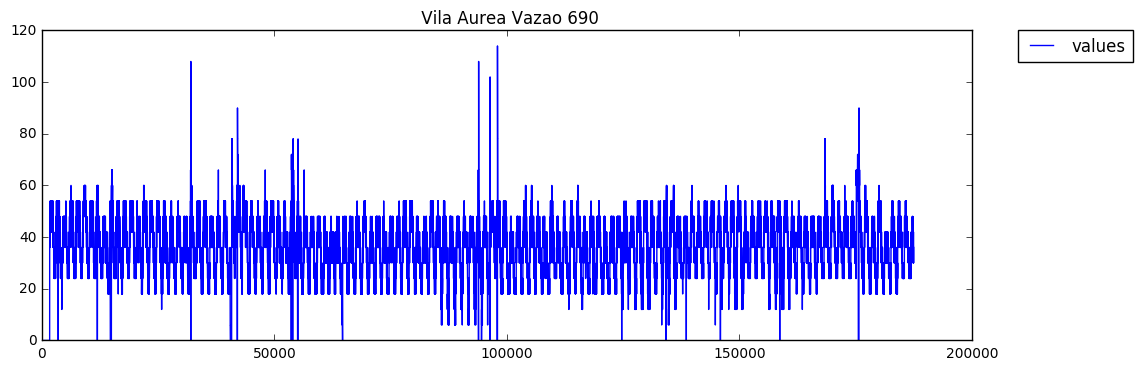

In [19]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(newV,label='values')
plt.title(' Vila Aurea Vazao 690')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [58]:
train_size = int(len(newV) * 0.8)
test_size = len(newV) - train_size
train, test = newV[0:train_size], newV[train_size:train_size+test_size]

# training knn model
# Using  KNN
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(testX[0].shape)
print(trainX[0].shape)

(60,)
(60,)


In [21]:
# train a classifier (not filtered)
clf_KNN = KNeighborsRegressor(n_neighbors=1, metric='manhattan')
clf_KNN.fit(trainX, trainY)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [59]:
forecast_KNN = forecasting(testX[0], clf_KNN, 1440)

In [23]:
print("mean square error KNN = ",mean_squared_error(testY[:1440],forecast_KNN))

('mean square error KNN = ', 37.149999999999999)


In [279]:
# Now, we'll train a LSTM model

scaler = MinMaxScaler(feature_range=(0, 1))
# normalize the dataset
datasetLstmTrain = scaler.fit_transform(train)
datasetLstmTest = scaler.fit_transform(test)

In [280]:
# Using LSTM
look_back = 60
trainX_lstm, trainY_lstm = create_dataset(datasetLstmTrain, look_back)
testX_lstm, testY_lstm = create_dataset(datasetLstmTest, look_back)
# reshape input to be [samples, time steps, features]
trainX_lstm = np.reshape(trainX_lstm, (trainX_lstm.shape[0], 1, trainX_lstm.shape[1]))
testX_lstm = np.reshape(testX_lstm, (testX_lstm.shape[0], 1, testX_lstm.shape[1]))



In [200]:
#build the model
model = Sequential()
model.add(LSTM(10, input_dim=look_back))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX_lstm, trainY_lstm, nb_epoch=4, batch_size=128, verbose=1)

Epoch 1/4
149911/149911 [==============================] - 9s - loss: 0.0017     
Epoch 2/4
149911/149911 [==============================] - 8s - loss: 8.2118e-04     
Epoch 3/4
149911/149911 [==============================] - 6s - loss: 7.7446e-04     
Epoch 4/4
149911/149911 [==============================] - 6s - loss: 7.5561e-04     


In [301]:
# function to apply forecasting for LSTM network
def lstm_forecasting(lastValue, classifier, size_forecasting=1):

    lastValue = np.reshape(lastValue, (1, 1, lastValue[0].shape[0]))
    X = lastValue
    forecast = []

    #result = classifier.predict([X])
    #forecast = [item for item in result]

    for i in range(size_forecasting):
        result = classifier.predict([X])
        X = X.tolist()
        aux = X[0][0][1:]
        X[0][0]=[]
        X[0][0]=aux
        X[0][0].append(result[0][0])
        X = np.array(X)
        np.delete(X[0][0],0)
        X = np.reshape(X, (1, 1, 60))
        #np.append(X,result, axis=2)
        forecast.append(result[0][0])
    
    return np.array(forecast)

In [302]:
forecast_LSTM = lstm_forecasting(testX_lstm[0],model,1440)
print(forecast_LSTM)

[ 0.53116125  0.5302133   0.53054398 ...,  0.47932267  0.47932267
  0.47932267]


In [303]:
# rescaling back to initial dimension
forecast_LSTM = scaler.inverse_transform(forecast_LSTM)
testY_lstm = scaler.inverse_transform(testY_lstm)

In [305]:
#print(testY_lstm, forecast_LSTM)
print("mean square error score LSTM = ",mean_squared_error(testY_lstm[:1440],forecast_LSTM))

('mean square error score LSTM = ', 130.33319069719843)


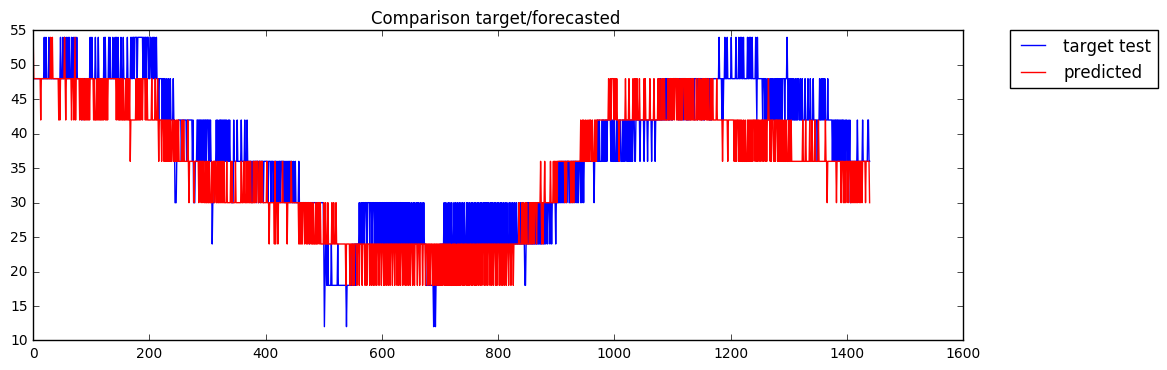

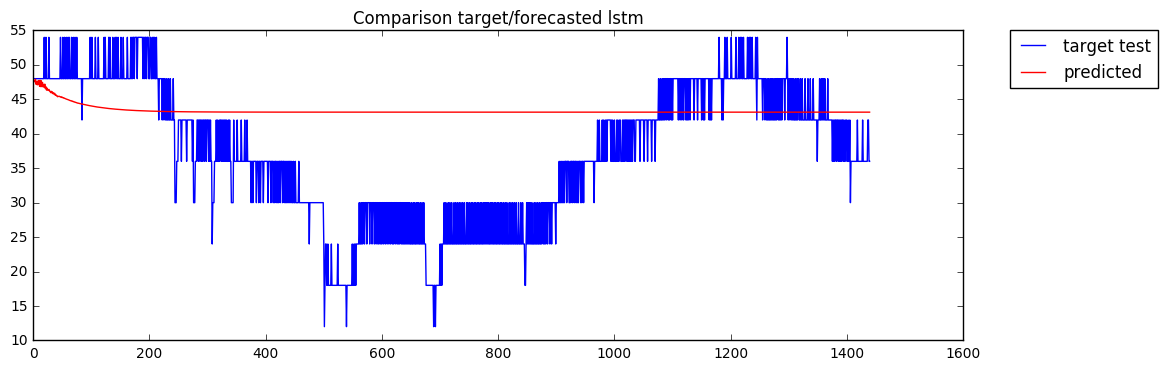

In [307]:
#plotting knn results
testPredictPlot = np.empty((int(newV.shape[0])))
testPredictPlot[:] = np.nan
testPredictPlot = forecast_KNN
testPredictLstmPlot = np.empty((int(newV.shape[0])))
testPredictLstmPlot[:] = np.nan
testPredictLstmPlot = forecast_LSTM

plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(testY[0:1440],color='b',label='target test')
plt.plot(testPredictPlot, color='r', label='predicted')
plt.title('Comparison target/forecasted ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(testY_lstm[0:1440],color='b',label='target test')
plt.plot(testPredictLstmPlot, color='r', label='predicted')
plt.title('Comparison target/forecasted lstm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()